In [5]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
import sklearn
import importlib.util
import pickle

In [6]:
# importing template file 
spec = importlib.util.spec_from_file_location("Template", "/home/admin1/PycharmProjects/ML/Week10/Template/template.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
# creating object of Template class
temp = foo.Template()

In [7]:
# read file
df=temp.read_file('test_data.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,35,59000,0
1,43,129000,1
2,51,23000,1
3,28,44000,0
4,35,58000,0


In [8]:
# separating features and labels of training dataset
x_test=df.iloc[:,[0,1]].values
y_test=df.iloc[:,2].values


In [9]:
# reading the pickle file
fileObject = open('train_data.pkl','rb')
classifier = pickle.load(fileObject)
sc=pickle.load(fileObject)


In [10]:
# feature scaling
x_test=sc.transform(x_test)

Test matrix
 [[72  6]
 [25 17]]
Accuracy of test data = 66.3919413919414


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


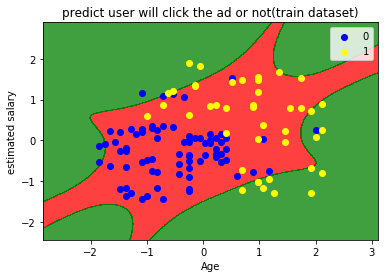

In [11]:
class SupportVector:
    
    def get_predictions(self,x):        
        # getting prediction values
        y_pred = classifier.predict(x)
        return y_pred
    
    def create_confusion_matrix(self,y,y_pred):
        # making confusion matrix
        cm= confusion_matrix(y,y_pred)
        return cm
    
    def get_accuracy(self,y_train,y_pred):
        Accuracy = sklearn.metrics.balanced_accuracy_score(y_train,y_pred)*100
        return Accuracy
                
def main():
    # creates class object 
    obj = SupportVector()
    y_pred_test = obj.get_predictions(x_test)
    
    cm=obj.create_confusion_matrix(y_test,y_pred_test)
    print("Test matrix\n",cm)
    
    acc_test = obj.get_accuracy(y_test,y_pred_test)
    print("Accuracy of test data =",acc_test)
    
    temp.visualization(y_pred_test,x_test,y_test,classifier)
    
if __name__ == '__main__':
    main()